In [54]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from kaggle.api.kaggle_api_extended import KaggleApi
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style 
import librosa as lr
import librosa.display
from mpl_toolkits.mplot3d import axes3d
import IPython.display as ipd
import struct
%matplotlib inline

In [55]:
style.use('ggplot')
sns.set_context('notebook')
cmap = 'RdYlGn'
sns.set_palette(cmap)

In [16]:
# os.environ['KAGGLE_USERNAME'] = 'dominikhuffield'
# os.environ['KAGGLE_KEY'] = '8c3e0e563a54b721c738e9e76f6ce335'

In [17]:
# api = KaggleApi()
# api.authenticate()
# api.competition_download_file('dlsprint')

In [18]:
# !kaggle competitions download -c dlsprint

100%|██████████████████████████████████████▉| 7.42G/7.43G [00:59<00:00, 139MB/s]
100%|███████████████████████████████████████| 7.43G/7.43G [00:59<00:00, 134MB/s]


In [24]:
path = "/home/cogentdom/data/train_files/"
allFiles = glob.glob(os.path.join(path,"*.mp3"))

In [27]:
train = pd.read_csv('data/train.csv')

In [28]:
train.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale
0,6c274d3678353b62f5d3465c771e4a8c5cd917186a5323...,common_voice_bn_30991326.mp3,বাবা সত্যেন ঘোষ।,1.0,1.0,NaN,NaN,NaN,bn
1,3991c2cfe1be64e77f2f6bdaeaae601219af906c1295cd...,common_voice_bn_30991371.mp3,দেওয়ান ফরিদ গাজী বাংলাদেশ আওয়ামী লীগের উপদেষ...,1.0,0.0,NaN,NaN,NaN,bn
2,3991c2cfe1be64e77f2f6bdaeaae601219af906c1295cd...,common_voice_bn_30991410.mp3,এর মাধ্যমে কারও গান গাওয়া দক্ষতা বা নিজস্ব ধর...,0.0,0.0,NaN,NaN,NaN,bn
3,08cb638755d8adbe55e3149211af88853e0d77785397f9...,common_voice_bn_30991432.mp3,"আপনি খুব একটা কথা বলার লোক নন, তাই না?",0.0,0.0,NaN,NaN,NaN,bn
4,51215b6882d5fdc8a9856b095793244085341470a888f5...,common_voice_bn_30991478.mp3,"আপনি খুব একটা কথা বলার লোক নন, তাই না?",0.0,0.0,NaN,NaN,চট্টগ্রামের ভাষার সামান্য টানসহ মোটামুটি প্রমি...,bn


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206950 entries, 0 to 206949
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   client_id   206950 non-null  object 
 1   path        206950 non-null  object 
 2   sentence    206950 non-null  object 
 3   up_votes    206950 non-null  float64
 4   down_votes  206950 non-null  float64
 5   age         60309 non-null   object 
 6   gender      61196 non-null   object 
 7   accents     11088 non-null   object 
 8   locale      206950 non-null  object 
dtypes: float64(2), object(7)
memory usage: 14.2+ MB


In [30]:
train.describe()

,up_votes,down_votes
count,206950.000000,206950.000000
mean,0.442841,0.072167
std,1.949432,0.429361
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,124.000000,48.000000


In [50]:
audio_path = allFiles[0]

In [51]:
audio, sfreq = lr.load(audio_path)
time = np.arange(0, len(audio)) / sfreq

/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:550: FutureWarning: Pass size=57948 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y_hat = util.fix_length(y_hat, n_samples, **kwargs)


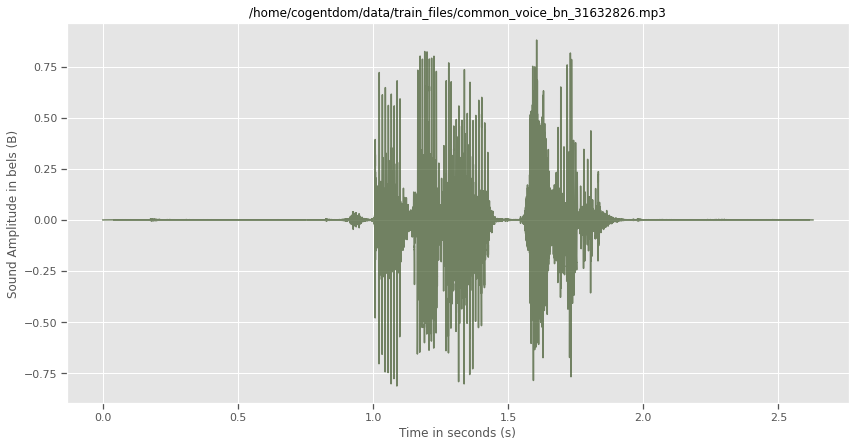

In [73]:
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(time, audio, alpha=0.7, color='#40572b')
ax.set(title=audio_path, xlabel='Time in seconds (s)', ylabel='Sound Amplitude in bels (B)')


ipd.Audio(audio_path)

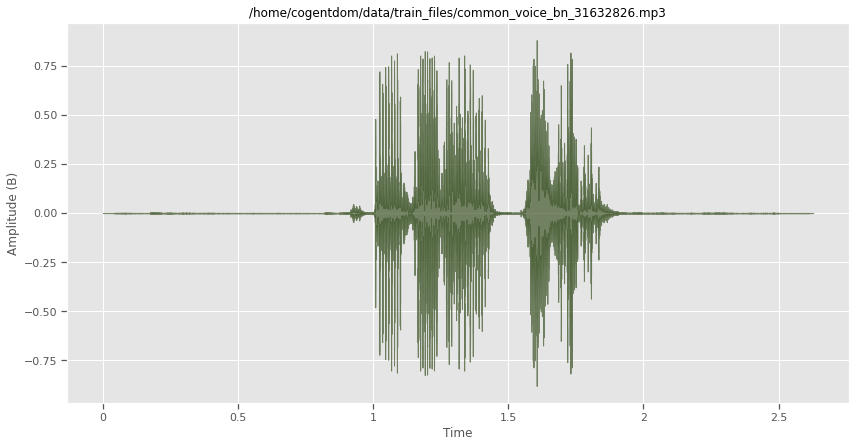

In [72]:
plt.figure(figsize=(14,7))
lr.display.waveshow(audio, sr=sfreq, alpha=0.7, color='#40572b')
plt.ylabel('Amplitude (B)')
plt.title(audio_path)

ipd.Audio(audio_path)

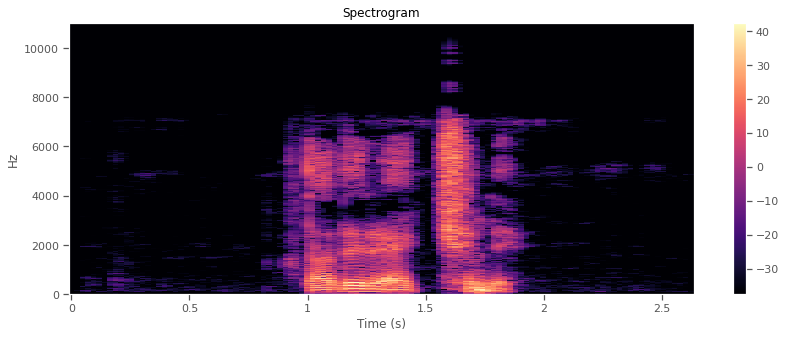

In [67]:
#display Spectrogram
X = librosa.stft(audio)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sfreq, x_axis='s', y_axis='hz', cmap='magma') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.title('Spectrogram')
plt.colorbar()
plt.show()

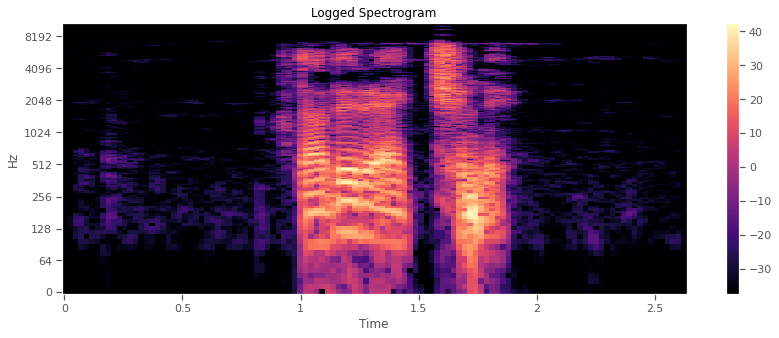

In [68]:
#display Spectrogram
X = librosa.stft(audio)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
# librosa.display.specshow(Xdb, sr=sfreq, x_axis='time', y_axis='hz', cmap=cmap) 
#If to pring log of frequencies  
librosa.display.specshow(Xdb, sr=sfreq, x_axis='time', y_axis='log', cmap='magma')
plt.title('Logged Spectrogram')
plt.colorbar()
plt.show()